## TIME COMPLEXITY 

In [16]:
import time
import psutil
from matplotlib import pyplot as plt

In [17]:
def fibonacci_for_loop(n):
    if n == 0:
        return 0
    one,two = 0,1
    for _ in range(n-1):
        temp = two
        two = one+two
        one = temp        
    return two    


def fibonacci_while_loop(n):
    if n == 0:
        return 0
    one,two = 0, 1
    while n > 1:
        temp = two
        two = one + two
        one = temp
        n -= 1
    return two


def fibonacci_recursion(n):
    if n <= 1:
        return n
    else:
        return (fibonacci_recursion(n-1) + fibonacci_recursion(n-2))


def fibonacci_dynamic_programming_tabulation(n):
    if n < 2:
         return n
    memo = [0] * (n+1)
    memo[0] = 0
    memo[1] = 1
    for i in range(2,n+1):
           memo[i] = memo[i-1] + memo[i-2]   
    return memo[n]


def fibonacci_dynamic_programming_memoization(n):
    memo = [0,1]
    if n == 0:
        return 0
    for _ in range(n-1):
        memo.append(memo[-1]+memo[-2])
    return memo[-1]


memo_1 = [0, 1]
def fibonacci_dynamic_programming_memoization_1(n):
    global memo_1  
    if n < len(memo_1):
        return memo_1[n]

    for _ in range(len(memo_1), n + 1):
        memo_1.append(memo_1[-1] + memo_1[-2])

    return memo_1[-1]

In [18]:
x = 10
y = 23

print(f'fibonacci_for_loop for n = 10 is {fibonacci_for_loop(x)} and for n = 23 is {fibonacci_for_loop(y)}')
print(f'fibonacci_while_loop for n = 10 is {fibonacci_while_loop(x)} and for n = 23 is {fibonacci_while_loop(y)}')
print(f'fibonacci_recursion for n = 10 is {fibonacci_recursion(x)} and for n = 23 is {fibonacci_recursion(y)}')
print(f'fibonacci_dynamic_programming_tabulation for n = 10 is {fibonacci_dynamic_programming_tabulation(x)} and for n = 23 is {fibonacci_dynamic_programming_tabulation(y)}')
print(f'fibonacci_dynamic_programming_memoization for n = 10 is {fibonacci_dynamic_programming_memoization(x)} and for n = 23 is {fibonacci_dynamic_programming_memoization(y)}')
print(f'fibonacci_dynamic_programming_memoization_1 for n = 10 is {fibonacci_dynamic_programming_memoization_1(x)} and for n = 23 is {fibonacci_dynamic_programming_memoization_1(y)}')

fibonacci_for_loop for n = 10 is 55 and for n = 23 is 28657
fibonacci_while_loop for n = 10 is 55 and for n = 23 is 28657
fibonacci_recursion for n = 10 is 55 and for n = 23 is 28657
fibonacci_dynamic_programming_tabulation for n = 10 is 55 and for n = 23 is 28657
fibonacci_dynamic_programming_memoization for n = 10 is 55 and for n = 23 is 28657
fibonacci_dynamic_programming_memoization_1 for n = 10 is 55 and for n = 23 is 28657


In [19]:
array_time_fibonacci_for_loop = []
array_time_fibonacci_while_loop = []
array_time_fibonacci_recursion = []
array_time_fibonacci_dynamic_programming_tabulation= []
array_time_fibonacci_dynamic_programming_memoization = []
array_time_fibonacci_dynamic_programming_memoization_1 = []

In [20]:
for i in range(100):  
    start_fibonacci_for_loop = time.time_ns()
    fibonacci_for_loop(i)
    end_fibonacci_for_loop = time.time_ns()
    array_time_fibonacci_for_loop.append(end_fibonacci_for_loop - start_fibonacci_for_loop)  

In [21]:
for i in range(40):
    start_fibonacci_recursion = time.time_ns()
    fibonacci_recursion(i)
    end_fibonacci_recursion = time.time_ns()
    array_time_fibonacci_recursion.append(end_fibonacci_recursion - start_fibonacci_recursion)

In [22]:
for i in range(100):
    start_fibonacci_dynamic_programming_tabulation = time.time_ns()
    fibonacci_dynamic_programming_tabulation(i)
    end_fibonacci_dynamic_programming_tabulation = time.time_ns()
    array_time_fibonacci_dynamic_programming_tabulation.append(end_fibonacci_dynamic_programming_tabulation - start_fibonacci_dynamic_programming_tabulation)

In [23]:
for i in range(100):
    start_fibonacci_dynamic_programming_memoization = time.time_ns()
    fibonacci_dynamic_programming_memoization(i)
    end_fibonacci_dynamic_programming_memoization = time.time_ns()
    array_time_fibonacci_dynamic_programming_memoization.append(end_fibonacci_dynamic_programming_memoization - start_fibonacci_dynamic_programming_memoization)

In [24]:
for i in range(100): 
    start_fibonacci_while_loop = time.time_ns()
    fibonacci_while_loop(i)
    end_fibonacci_while_loop = time.time_ns()
    array_time_fibonacci_while_loop.append(end_fibonacci_while_loop - start_fibonacci_while_loop)

In [25]:
for i in range(100):
    start_fibonacci_dynamic_programming_memoization_1 = time.time_ns()
    fibonacci_dynamic_programming_memoization_1(i)
    end_fibonacci_dynamic_programming_memoization_1 = time.time_ns()
    array_time_fibonacci_dynamic_programming_memoization_1.append(end_fibonacci_dynamic_programming_memoization_1 - start_fibonacci_dynamic_programming_memoization_1)

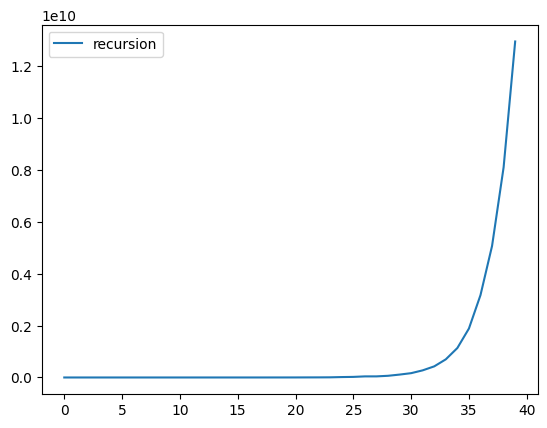

In [26]:
x_1 = [x for x in range(40)]
y_1 = array_time_fibonacci_recursion
plt.plot(x_1, y_1, label='recursion')
plt.legend()
plt.show()

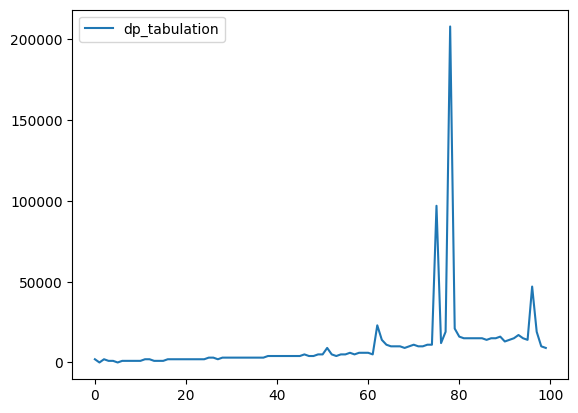

In [27]:
x_2 = [x for x in range(100)]
y_2 = array_time_fibonacci_dynamic_programming_tabulation
plt.plot(x_2, y_2, label='dp_tabulation')
plt.legend()
plt.show()

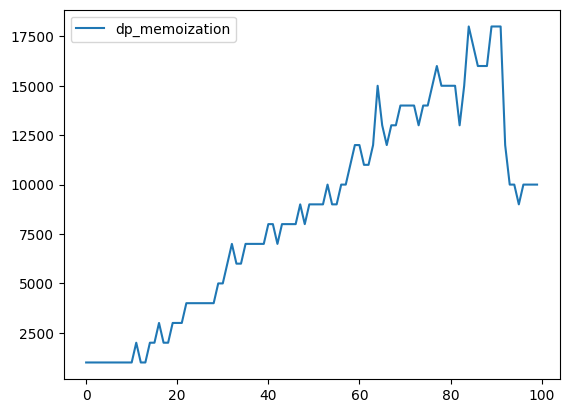

In [28]:
x_3 = [x for x in range(100)]
y_3  = array_time_fibonacci_dynamic_programming_memoization
plt.plot(x_3, y_3, label='dp_memoization')
plt.legend()
plt.show()

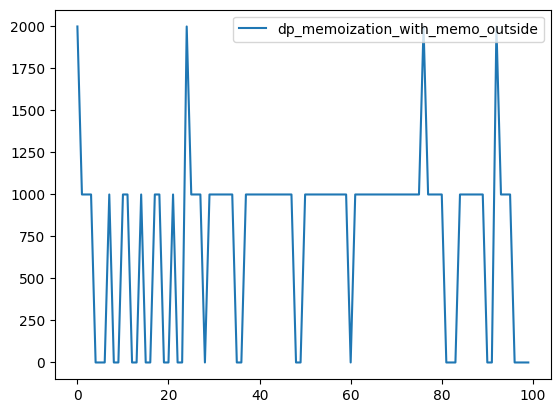

In [29]:
x_3_1 = [x for x in range(100)]
y_3_1  = array_time_fibonacci_dynamic_programming_memoization_1
plt.plot(x_3_1, y_3_1, label='dp_memoization_with_memo_outside')
plt.legend()
plt.show()

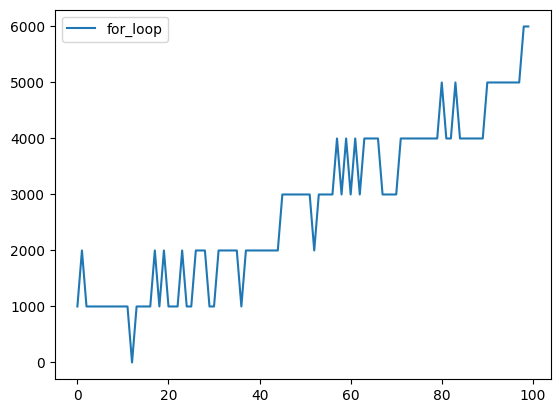

In [30]:
x_4 = [x for x in range(100)]
y_4 = array_time_fibonacci_for_loop
plt.plot(x_4, y_4, label='for_loop')
plt.legend()
plt.show()

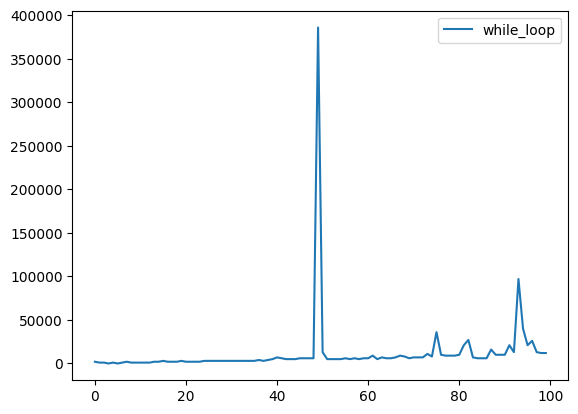

In [31]:
x_5 = [x for x in range(100)]
y_5 = array_time_fibonacci_while_loop
plt.plot(x_5, y_5, label='while_loop')
plt.legend()
plt.show()

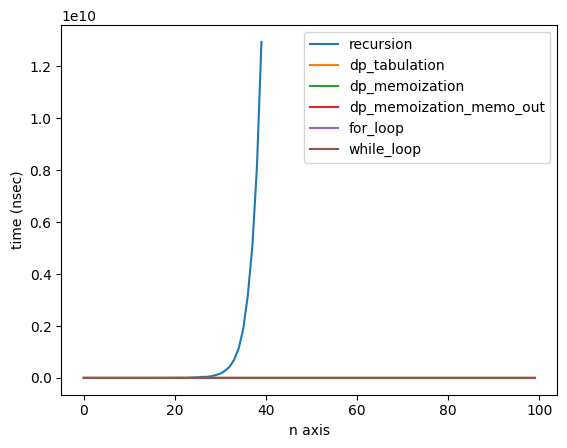

In [32]:
x_1 = [x for x in range(40)]
y_1 = array_time_fibonacci_recursion

x_2 = [x for x in range(100)]
y_2 = array_time_fibonacci_dynamic_programming_tabulation

x_3 = [x for x in range(100)]
y_3  = array_time_fibonacci_dynamic_programming_memoization

x_3_1 = [x for x in range(100)]
y_3_1  = array_time_fibonacci_dynamic_programming_memoization_1

x_4 = [x for x in range(100)]
y_4 = array_time_fibonacci_for_loop

x_5 = [x for x in range(100)]
y_5 = array_time_fibonacci_while_loop

plt.plot(x_1, y_1, label='recursion')
plt.plot(x_2, y_2, label='dp_tabulation')
plt.plot(x_3, y_3, label='dp_memoization')
plt.plot(x_3_1, y_3_1, label='dp_memoization_memo_out')
plt.plot(x_4, y_4, label='for_loop')
plt.plot(x_5, y_5, label='while_loop')

plt.legend()
plt.xlabel('n axis')
plt.ylabel('time (nsec)')
 
plt.show()

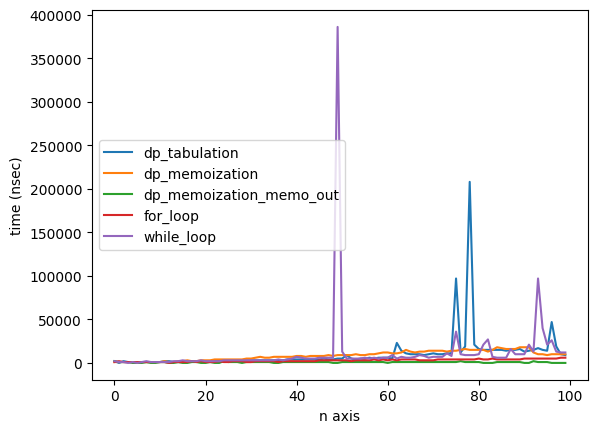

In [33]:
x_2 = [x for x in range(100)]
y_2 = array_time_fibonacci_dynamic_programming_tabulation

x_3 = [x for x in range(100)]
y_3  = array_time_fibonacci_dynamic_programming_memoization

x_3_1 = [x for x in range(100)]
y_3_1  = array_time_fibonacci_dynamic_programming_memoization_1

x_4 = [x for x in range(100)]
y_4 = array_time_fibonacci_for_loop

x_5 = [x for x in range(100)]
y_5 = array_time_fibonacci_while_loop

plt.plot(x_2, y_2, label='dp_tabulation')
plt.plot(x_3, y_3, label='dp_memoization')
plt.plot(x_3_1, y_3_1, label='dp_memoization_memo_out')
plt.plot(x_4, y_4, label='for_loop')
plt.plot(x_5, y_5, label='while_loop')

plt.xlabel('n axis')
plt.ylabel('time (nsec)')
#plt.title('')
plt.legend()
plt.show()

In [34]:
n_values = list(range(100))

# List to store memory usage for each function
memory_usage_lists = {
    "For Loop": [],
    "While Loop": [],
    "Recursion": [],
    "Dynamic Tabulation": [],
    "Dynamic Memoization": [],
    "Dynamic Memoization 1": [],
}

In [35]:
n_values = list(range(100))

# Measure memory usage for each n and each function
for n in n_values:
    memory_before = psutil.virtual_memory().used
    fibonacci_for_loop(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["For Loop"].append(memory_used)

    memory_before = psutil.virtual_memory().used
    fibonacci_while_loop(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["While Loop"].append(memory_used)

    if n <= 40:  # Limit recursion due to performance
        memory_before = psutil.virtual_memory().used
        fibonacci_recursion(n)
        memory_after = psutil.virtual_memory().used
        memory_used = abs(memory_after - memory_before)  # Take the absolute value
        memory_usage_lists["Recursion"].append(memory_used)

    memory_before = psutil.virtual_memory().used
    fibonacci_dynamic_programming_tabulation(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Dynamic Tabulation"].append(memory_used)


    memory_before = psutil.virtual_memory().used
    fibonacci_dynamic_programming_memoization(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Dynamic Memoization"].append(memory_used)


    memory_before = psutil.virtual_memory().used
    fibonacci_dynamic_programming_memoization_1(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Dynamic Memoization 1"].append(memory_used)


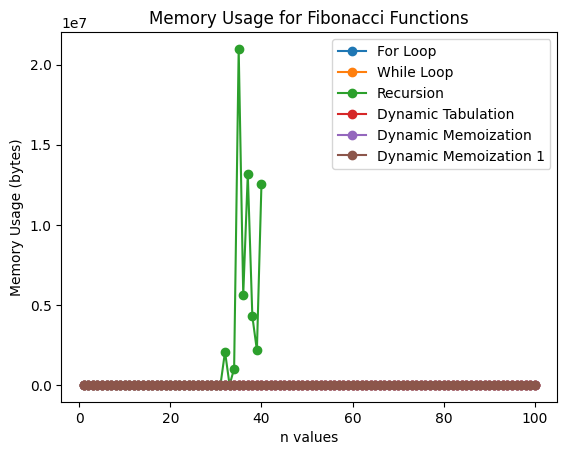

In [36]:
# Plot the results
for func_name, memory_usage_list in memory_usage_lists.items():
    plt.plot(n_values[:len(memory_usage_list)], memory_usage_list, marker='o', label=func_name)

plt.xlabel('n values')
plt.ylabel('Memory Usage (bytes)')
plt.title('Memory Usage for Fibonacci Functions')
plt.legend()
plt.show()